In [3]:
#Imports
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# this helps to avoid changing file paths manually
import os 
print(os.getcwd())
import sys
path = os.path.abspath(os.path.join('../../')) # or the path to your source code
sys.path.insert(0, path)
print(path)

/home/jon/Documents/HEC/HEC/Session 4 Winter 2024/Text Mining/Project/NLP-FakeNews-Detection/SentimentAnalysis
/home/jon/Documents/HEC/HEC/Session 4 Winter 2024/Text Mining/Project


In [6]:
#Load data 
#Path to Excel file
file_path = path + '/NLP-FakeNews-Detection/archive/truth_seeker.xlsx'

#Read Excel file
df = pd.read_excel(file_path)

#Remove NA from tweet
df = df.dropna(subset=['tweet'])

In [7]:
#Defining a function to calculate polarity score and categorize sentiment

def analyze_sentiment(text):
    # Use TextBlob to get the polarity of the text 
    polarity = TextBlob(str(text)).sentiment.polarity
    
    #Categorize the sentiment based on the polarity score
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else: 
        sentiment = 'neutral'
   
    return polarity, sentiment

In [8]:
#Apply the function to the tweet colymn and create 2 new columns for the results 
df[['polarity score', 'tone']] = df['tweet'].apply(lambda x: pd.Series(analyze_sentiment(x)))

#Display the first few rows to verify the new columns
print(df[['tweet', 'polarity score', 'tone']].head())

                                               tweet  polarity score      tone
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...        0.500000  positive
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...        0.125000  positive
2  THE SUPREME COURT is siding with super rich pr...        0.206667  positive
3  @POTUS Biden Blunders\n\nBroken campaign promi...       -0.400000  negative
4  @OhComfy I agree. The confluence of events rig...        0.442857  positive


In [9]:
#Showing the unique values of tone to see that we have positive, negative, and neutral entries 
print(df['tone'].unique())

['positive' 'negative' 'neutral']


In [10]:
#Frequency table to explore split between positive, negative, and neutral 
tone_freq = df['tone'].value_counts()
print(tone_freq)

tone
positive    66231
negative    38959
neutral     29007
Name: count, dtype: int64


In [22]:
#User Demographic Analysis: analyze sentiment by different demographic groups

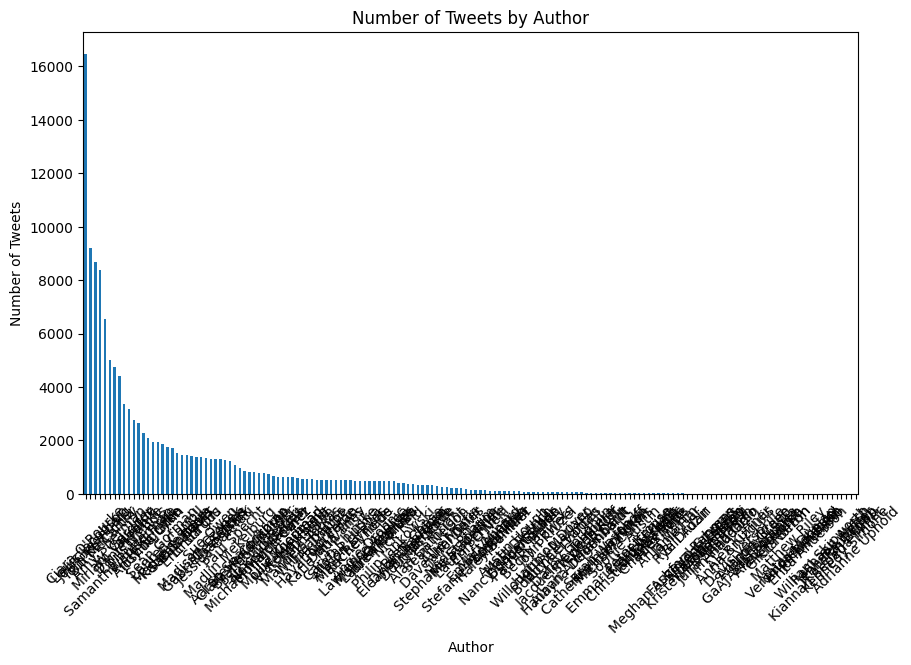

In [11]:
#Analyze which authors tweet the most
tweet_counts = df['author'].value_counts()

# Plotting tweet counts
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar')
plt.title('Number of Tweets by Author')
plt.xlabel('Author')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

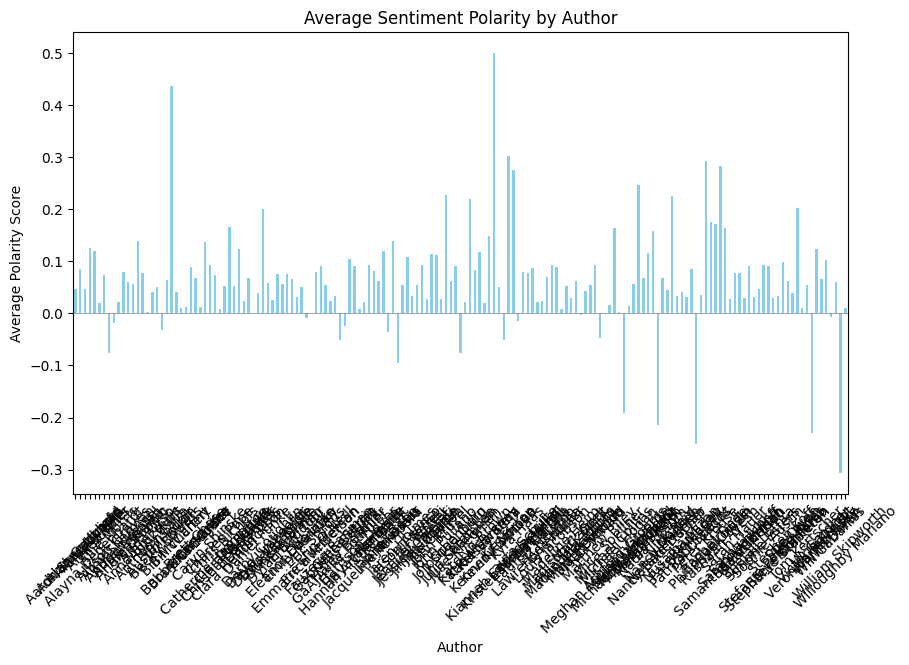

In [12]:
#Group by the authors and then calculate the mean polarity score
sentiment_distribution = df.groupby('author')['polarity score'].mean()

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Polarity by Author')
plt.xlabel('Author')
plt.ylabel('Average Polarity Score')
plt.axhline(0, color='gray', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

In [13]:
# Finding the author with the maximum polarity score
max_polarity_author = df.loc[df['polarity score'].idxmax(), 'author']

# Finding the author with the minimum polarity score
min_polarity_author = df.loc[df['polarity score'].idxmin(), 'author']

print("The author with the highest polarity score is ",max_polarity_author," and the author with the lowest polarity score is ",min_polarity_author,".")

The author with the highest polarity score is  D.L. Davis  and the author with the lowest polarity score is  D.L. Davis .


In [ ]:
#Here we can see that it is the same author. 
#The author might express a wide range of emotions in their tweets, resulting in some tweets being 
#very positive and others being very negative.

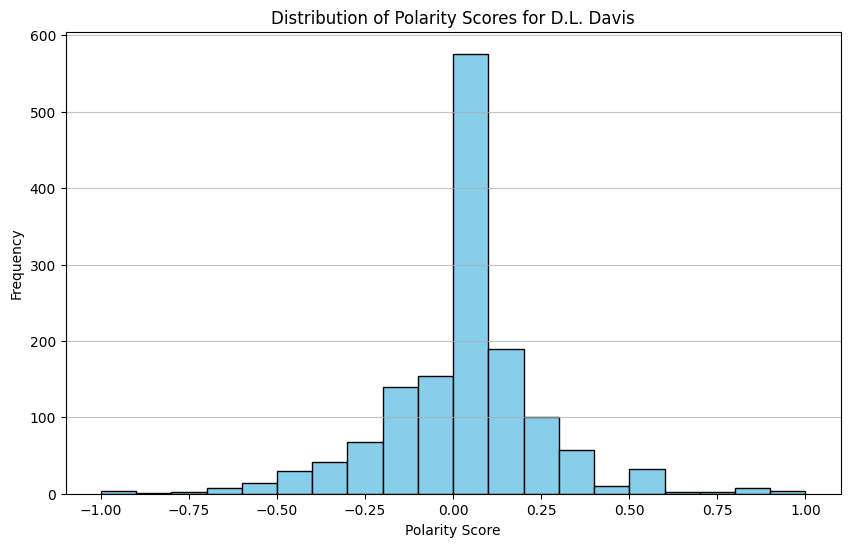

In [14]:
#Showing the distribution of the polarity in tweets by D.L. Davis

# Filter the dataframe for the selected author
author_df = df[df['author'] == 'D.L. Davis']

# Plot the distribution of polarity scores for the selected author
plt.figure(figsize=(10, 6))
plt.hist(author_df['polarity score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores for D.L. Davis')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
#Find the percentage of tweets by DL Davis relative to all other authors

# Count the number of tweets per author
tweets_per_author = df['author'].value_counts()

# Calculate the percentage of tweets by 'author1'
DLDavis_percentage = (tweets_per_author['D.L. Davis'] / tweets_per_author.sum()) * 100

DLDavis_percentage

1.0760300155741187

In [16]:
# To find the author with the highest percentage of tweets

# Count the number of tweets per author
tweets_per_author = df['author'].value_counts(normalize=True) * 100  # This will give the percentage directly

# Identify the author with the highest percentage of tweets
author_with_most_tweets = tweets_per_author.idxmax()
max_percentage = tweets_per_author.max()

(author_with_most_tweets, max_percentage)


("Ciara O'Rourke", 12.266295073660364)

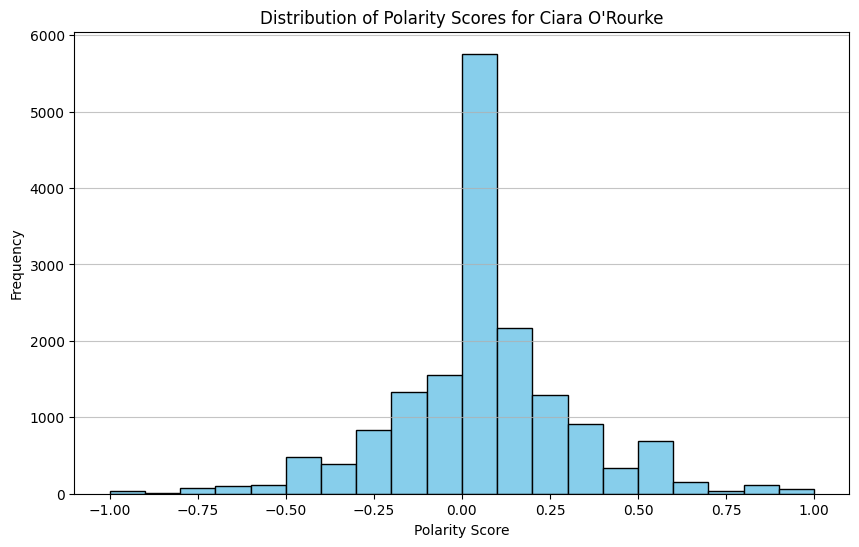

In [17]:
# Filter the dataframe for the selected author
author_df = df[df['author'] == "Ciara O'Rourke"]

# Plot the distribution of polarity scores for the selected author
plt.figure(figsize=(10, 6))
plt.hist(author_df['polarity score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores for Ciara O'Rourke")
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [18]:
#Finding skewness within polarity scores for each author

# Calculate skewness for each author
polarity_skewness = df.groupby('author')['polarity score'].skew()

# Find the author with the most left-skewed distribution
most_left_skewed_author = polarity_skewness.idxmin()

# Find the author with the most right-skewed distribution
most_right_skewed_author = polarity_skewness.idxmax()

# Output the results
polarity_skewness, most_left_skewed_author, most_right_skewed_author

(author
 Aaron Sharockman     -0.207368
 Adrianne Uphold            NaN
 Alan Gathright       -0.857169
 Alan Hovorka          0.522165
 Alayna Degenhardt     0.335715
                         ...   
 Warren Fiske          0.288144
 Will Cabaniss         0.257756
 Will Doran           -0.153917
 William Skipworth    -1.952233
 Willoughby Mariano    0.152478
 Name: polarity score, Length: 161, dtype: float64,
 'Janel Davis',
 'Alex Wilts')

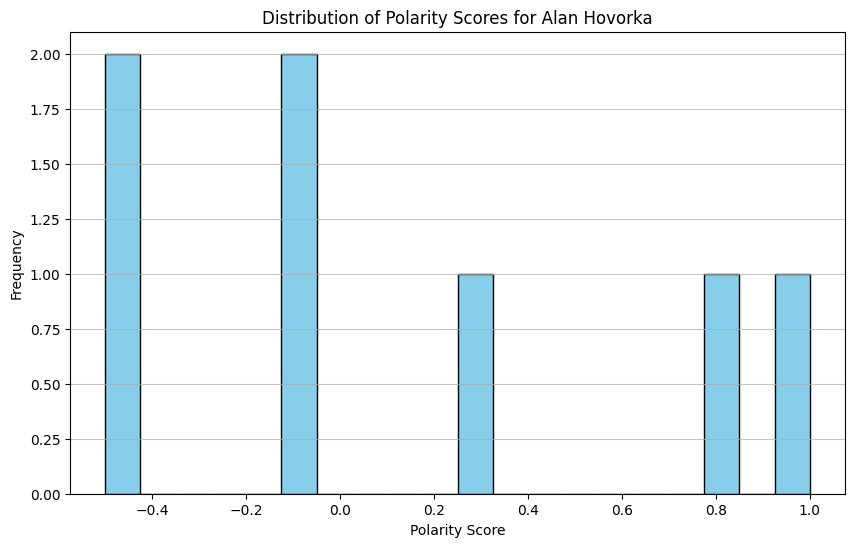

In [19]:
# Filter the dataframe for the selected author
author_df = df[df['author'] == "Alan Hovorka"]

# Plot the distribution of polarity scores for the selected author
plt.figure(figsize=(10, 6))
plt.hist(author_df['polarity score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores for Alan Hovorka")
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()